In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


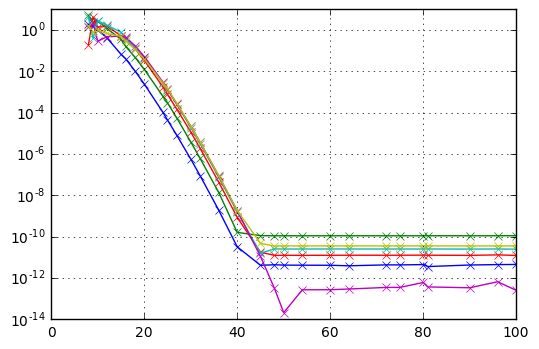

In [26]:
D = loadtxt("../../fft/pw.txt", skiprows=5)

Ng = D[:, 0]
pw_eigs = D[:, 2:]

eigs_conv = pw_eigs[-1,:]
for i in range(6):
    semilogy(Ng, abs(pw_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

In [27]:
print "Converged (reference) eigenvalues"
for i in range(6):
    print i+1, eigs_conv[i]

Converged (reference) eigenvalues
1 -16.236538152
2 -8.23575501124
3 -2.06943115855
4 2.35981860691
5 5.32585834266
6 7.31156776186


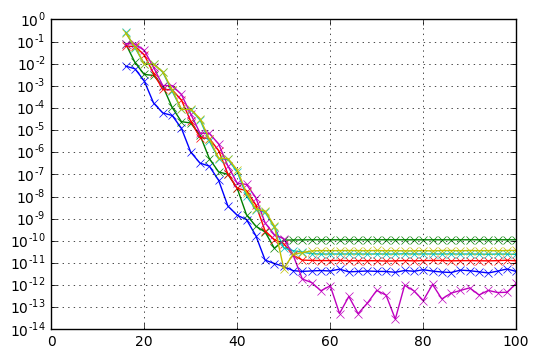

In [31]:
D = loadtxt("../sfem2.txt")

sfem_DOFs = D[:, 0]
sfem_p = D[:, 1]
sfem_eigs = D[:, 5:]

for i in range(6):
    semilogy(sfem_DOFs, abs(sfem_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

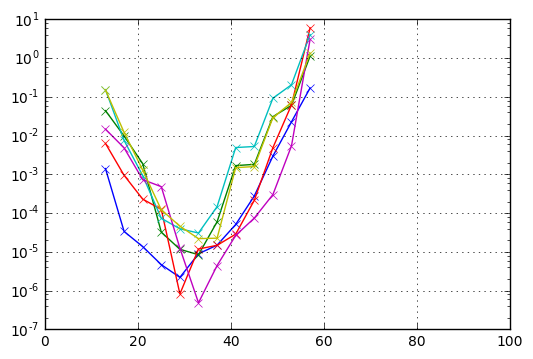

In [39]:
D = loadtxt("../sfem_enr.txt")

sfem_enr_DOFs = D[:, 0]
sfem_enr_p = D[:, 1]
sfem_enr_eigs = D[:, 5:]

for i in range(6):
    semilogy(sfem_enr_DOFs, abs(sfem_enr_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

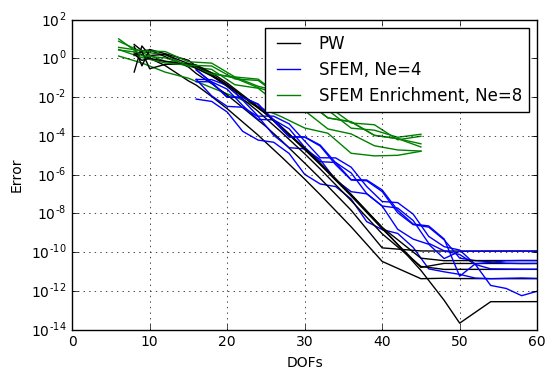

In [38]:
for i in range(6):
    if i == 0:
        kwargs = {"label": "PW"}
    else:
        kwargs = {}
    semilogy(Ng, abs(pw_eigs[:, i]-eigs_conv[i]), "k-", **kwargs)
    if i == 0:
        kwargs = {"label": "SFEM, Ne=4"}
    else:
        kwargs = {}
    semilogy(sfem_DOFs, abs(sfem_eigs[:, i]-eigs_conv[i]), "b-", **kwargs)
    if i == 0:
        kwargs = {"label": "SFEM Enrichment, Ne=8"}
    else:
        kwargs = {}
    semilogy(sfem_enr_DOFs, abs(sfem_enr_eigs[:, i]-eigs_conv[i]), "g-", **kwargs)

grid()
xlim([0, 60])
xlabel("DOFs")
ylabel("Error")
legend()
savefig("conv1d.pdf")
show()